In [1]:
import numpy as np
from functools import partial
import pandas as pd
#import matplotlib as mpl
#mpl.rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

import sys
sys.path.append('../python/')
import EdwRes

In [2]:
data = pd.read_csv("edelweiss_GGA1_pointData.txt", skiprows=1, header=None, delim_whitespace=True)
print (data.head(5))
list(data.columns.values)

          0         1
0  104.1920  1.150560
1  120.3400  1.018400
2  127.9750  0.988728
3   22.3243  0.400158
4  111.5070  1.025590


[0, 1]

In [3]:
# ER band has 20 keV bins 
bin_edges = np.arange(0, 220, step=20)
labels = np.arange(0,len(bin_edges)-1, step=1)
print (bin_edges, labels)

[  0  20  40  60  80 100 120 140 160 180 200] [0 1 2 3 4 5 6 7 8 9]


In [4]:
data['bin'] = pd.cut(data[0], bins=bin_edges, labels=labels)
print(data.head(5))

          0         1 bin
0  104.1920  1.150560   5
1  120.3400  1.018400   6
2  127.9750  0.988728   6
3   22.3243  0.400158   1
4  111.5070  1.025590   5


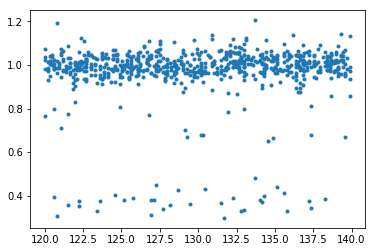

In [33]:
bin_num = 6
plt.plot(data[data['bin'] == bin_num][0], data[data['bin'] == bin_num][1], '.')

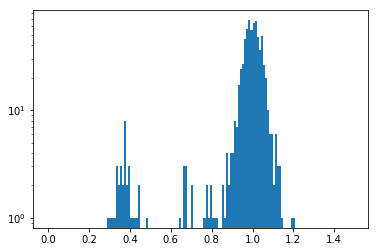

In [37]:
binspace = 0.01
hist_bins = np.arange(0, 1.5, binspace)
bin_num = 6
n, bins = np.histogram(data[data['bin'] == bin_num][1], bins=hist_bins)
fig = plt.hist(data[data['bin'] == bin_num][1], bins=hist_bins, log=True)
#print (n)

#plt.xlim(0.7,1.4)

In [7]:
#define a Gaussian 
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [14]:
#do a fit
from scipy.optimize import curve_fit

bin_num = 3
yield_min = 0.7
yield_max = 1.2

# sanitize fitdata
fitdata = data[data['bin'] == bin_num][1]
fitdata = fitdata[(fitdata > yield_min) & (fitdata < yield_max)]

n, bin_edges = np.histogram(fitdata, 100)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

ymean = np.mean(fitdata)
ysig = np.mean(fitdata)
ymax = np.max(fitdata)

popt, pcov = curve_fit(gaus,bin_centers,n,p0=[np.max(n), ymean, ysig])

print(popt)
print(pcov)

[18.70649477  0.99470255 -0.05109908]
[[ 4.14702152e-01 -6.27646425e-08  7.55391741e-04]
 [-6.27646425e-08  4.12605434e-06 -3.75662214e-10]
 [ 7.55391741e-04 -3.75662214e-10  4.12720613e-06]]


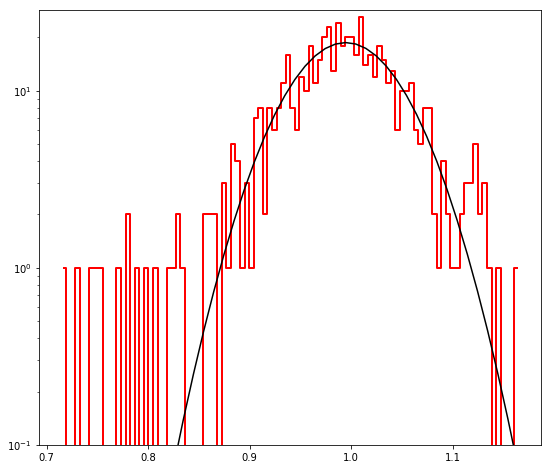

In [25]:
xmin = min(fitdata)
xmax = max(fitdata)
X = np.arange(xmin, xmax,0.01)

ymin = 0.1
ymax = np.max(n) * 1.1
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
ax1.set_yscale('log')
ax1.set_ylim(ymin, ymax)
step, = ax1.step(bin_centers, n, where='mid',color='r', linestyle='-', label='Yield', linewidth=2)
ax1.plot(X,gaus(X,*popt),'k-',label='fit')